# DZ-8_PANDAS. Data analysis 

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
# https://www.elsevier.com/__data/assets/excel_doc/0015/91122/Source-titles_ext_list_June_2020.xlsx
file = 'Source-titles_ext_list_June_2020.csv'
df = pd.read_csv(file, low_memory=False)


# Данные

Список первоисточников (журналов, книг и т.д.) индексируемые БД Scopus (Elseiver) указанием различных параметров, таких как: ISSN/ISBN, язык опубликования, индекс цитирования и т.д.

In [3]:
df.head()

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Titles discontinued by Scopus due to quality issues,Coverage,Article language in source (three-letter ISO language codes),2017\nCiteScore,2018\nCiteScore,...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
0,18500162600,21st Century Music,15343219,NaN,Inactive,NaN,2002-2011,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21100404576,2D Materials,NaN,20531583,Active,NaN,2014-ongoing,ENG,7.2,9.9,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
2,21100447128,3 Biotech,2190572X,21905738,Active,NaN,2015-ongoing,ENG,1.8,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21100779062,3D Printing and Additive Manufacturing,23297662,23297670,Active,NaN,2014-ongoing,ENG,4.1,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100932761,3D Printing in Medicine,NaN,23656271,Active,NaN,2019-ongoing,ENG,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Список параметров источников (название колонок в таблице данных)

In [4]:
# список названий колонок в таблице
df.columns

Index(['Sourcerecord ID',
       'Source Title (Medline-sourced journals are indicated in Green)',
       'Print-ISSN', 'E-ISSN', 'Active or Inactive',
       'Titles discontinued by Scopus due to quality issues', 'Coverage',
       'Article language in source (three-letter ISO language codes)',
       '2017\nCiteScore', '2018\nCiteScore', '2019 CiteScore',
       'Medline-sourced Title? (see more info under separate tab)',
       'Open Access status, i.e., registered in DOAJ and/or ROAD. Status April 2020\n',
       'Articles in Press included?', 'Added to list June 2020', 'Source Type',
       'Title history indication', 'Related title to title history indication',
       'Other related title 1', 'Other related title 2',
       'Other related title 3', 'Publisher's Name',
       'Publisher imprints grouped to main Publisher',
       'All Science Journal Classification Codes (ASJC)',
       'Top level:\n\nLife Sciences', 'Top level:\n\nSocial Sciences',
       'Top level:\n\nPhysical 

Получим список журналов, т.е. отфильтруем источники по типу - журнал.

In [5]:
# отфильтруем список, оставим только журналы
df_journal = df.loc[df['Source Type'] == 'Journal']
df_journal

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Titles discontinued by Scopus due to quality issues,Coverage,Article language in source (three-letter ISO language codes),2017\nCiteScore,2018\nCiteScore,...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
0,18500162600,21st Century Music,15343219,NaN,Inactive,NaN,2002-2011,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21100404576,2D Materials,NaN,20531583,Active,NaN,2014-ongoing,ENG,7.2,9.9,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
2,21100447128,3 Biotech,2190572X,21905738,Active,NaN,2015-ongoing,ENG,1.8,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21100779062,3D Printing and Additive Manufacturing,23297662,23297670,Active,NaN,2014-ongoing,ENG,4.1,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100932761,3D Printing in Medicine,NaN,23656271,Active,NaN,2019-ongoing,ENG,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,24168,ZWR,0044166X,NaN,Inactive,NaN,1970-1991,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40381,28883,Zygon,05912385,14679744,Active,NaN,1966-ongoing,ENG,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,Social Sciences,NaN,NaN,NaN
40382,19073,Zygote,09671994,14698730,Active,NaN,1993-ongoing,ENG,1.8,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40383,28135,Zywienie Czlowieka i Metabolizm,0209164X,NaN,Inactive,NaN,"1992, 1984-1990",NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Нас интерисуют журналы по определенной тематике - химия. Оставим только журналы у которых в колонке '1600\nChemistry' не пустое значение.
Список журналов по химии.

In [26]:
# журналы категории химия
journal_by_chemistry = df.loc[df['1600\nChemistry'].notnull()].sort_values(by=['2019 CiteScore', 
                                                                               '2018\nCiteScore', 
                                                                               '2017\nCiteScore'], 
                                                                           ascending=False)
# Топ журналов в категории химия
journal_by_chemistry.head()

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Titles discontinued by Scopus due to quality issues,Coverage,Article language in source (three-letter ISO language codes),2017\nCiteScore,2018\nCiteScore,...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
6968,23340,Chemical Reviews,00092665,15206890,Active,NaN,1924-ongoing,ENG,85.8,94.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6972,23350,Chemical Society Reviews,03060012,14604744,Active,NaN,1972-ongoing,ENG,72.7,70.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27987,17854,Nature Materials,14761122,14764660,Active,NaN,2002-ongoing,ENG,68.6,69.1,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
31800,26465,Progress in Polymer Science,00796700,NaN,Active,NaN,"1988-ongoing, 1980-1986, 1977-1978, 1975, 1970...",ENG,46.7,38.4,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
27966,18100156701,Nature Chemistry,17554330,17554349,Active,NaN,2009-ongoing,ENG,39.4,36.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим сколько журналов по химии выходят русском языке и выведем их список.

In [7]:
# рейтинг журналов выходящих на русском языке
journal_by_chemistry_rus = journal_by_chemistry[journal_by_chemistry['Article language in source (three-letter ISO language codes)'].str.contains(r'RUS', na=False)]
journal_by_chemistry_rus[['Source Title (Medline-sourced journals are indicated in Green)',
       'Print-ISSN', 'E-ISSN', 'Active or Inactive',
       'Titles discontinued by Scopus due to quality issues', 'Coverage',
       'Article language in source (three-letter ISO language codes)',
       '2017\nCiteScore', '2018\nCiteScore', '2019 CiteScore']]


,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Titles discontinued by Scopus due to quality issues,Coverage,Article language in source (three-letter ISO language codes),2017\nCiteScore,2018\nCiteScore,2019 CiteScore
25954,Macroheterocycles,19989539,NaN,Active,NaN,2008-ongoing,"ENG, RUS",1.5,1.7,1.6
38530,Tsvetnye Metally,03722929,NaN,Active,NaN,"2013-ongoing, 2001-2005, 1975-1988, 1970-1971",RUS,0.5,0.7,0.9
14788,Herald of the Bauman Moscow State Technical Un...,18123368,NaN,Active,NaN,2016-ongoing,RUS,0.2,0.4,0.9
2254,Analitika i Kontrol,20731442,20731450,Active,NaN,2016-ongoing,RUS,0.2,0.5,0.7
24965,Khimiya Rastitel'nogo Syr'ya,10295151,10295143,Active,NaN,2017-ongoing,RUS,0.0,0.2,0.5
39261,Voprosy Khimii i Khimicheskoi Tekhnologii,03214095,24137987,Active,NaN,2017-ongoing,"RUS, UKR",0.0,0.2,0.4
19058,"Izvestiya Vysshikh Uchebnykh Zavedenii, Seriya...",05792991,25003070,Active,NaN,"2017-ongoing, 1982, 1980",ENG;RUS,NaN,0.2,0.3
26981,Methods and Objects of Chemical Analysis,19910290,24136166,Active,NaN,2017-ongoing,RUS,0.0,0.2,0.2
23606,Journal of Siberian Federal University: Chemistry,19982836,23136049,Active,NaN,2019-ongoing,RUS,NaN,NaN,0.1
38677,Uchenye Zapiski Kazanskogo Universiteta. Seriy...,2542064X,2500218X,Active,NaN,2019-ongoing,RUS,NaN,NaN,0.0


Получим список журналов, которые относятся сразу к трем категориям.

In [8]:
# журналы входящие в категориии:
# 1303	Biochemistry
# 1605	Organic Chemistry
# 2502	Biomaterials


column = 'All Science Journal Classification Codes (ASJC)'

mask = lambda x: ("1303" in x) & ("1605" in x) & ("2502" in x)

# список журналов по категориям: 1303 Biochemistry, 1605 Organic Chemistry, 2502 Biomaterials
df.loc[df[column].apply(mask)]

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Titles discontinued by Scopus due to quality issues,Coverage,Article language in source (three-letter ISO language codes),2017\nCiteScore,2018\nCiteScore,...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
5044,25799,Biopolymers,00063525,10970282,Active,NaN,1963-ongoing,ENG,4.1,4.3,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30182,21100873487,Peptide Science,NaN,24758817,Active,NaN,2018-ongoing,ENG,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим динамику наполнения БД новыми журналами (по покрытию) 

<AxesSubplot:title={'center':'Динамика добавления новых журналов'}, xlabel='Год', ylabel='Колличество, шт.'>

<Figure size 432x288 with 0 Axes>

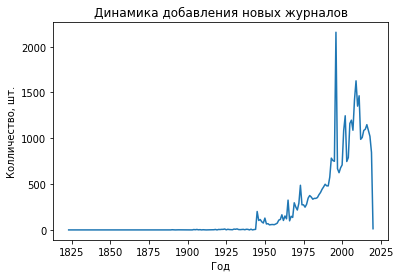

In [135]:
import matplotlib.pyplot as plt
plt.figure()
df_years = pd.to_numeric(df['Coverage'].str[:4], errors='ignore').reset_index().groupby('Coverage').agg('count')
df_years.reset_index().plot.line(x='Coverage', title='Динамика добавления новых журналов', xlabel='Год', ylabel='Колличество, шт.', legend=None)


Интересно посмотреть на каких языках публикуются журналы. Построим график распределения количества журналов по языку опубликования (ограничим десятью наиболее распростанеными языками).

<AxesSubplot:title={'center':'Распределение журналов по основным языкам'}, xlabel='язык', ylabel='Журналов, шт.'>

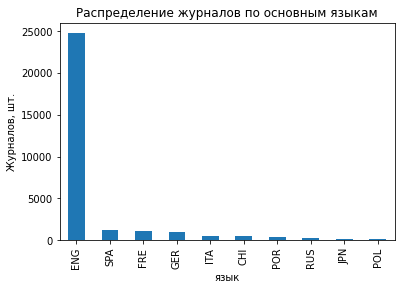

In [134]:
# список языков
column = 'Article language in source (three-letter ISO language codes)'
# df_langs = df[column].drop_duplicates().str.replace(';', ',').str.split(',')
df_langs = df[column].str.replace(';', ',').str.split(',')

from collections import defaultdict

langs = set()
langs_dict = defaultdict()
for sublist in df_langs.values:
    if type(sublist).__name__ == 'list':        
        for item in sublist:
            temp = item.strip()
            langs.add(temp)            
            if langs_dict.get(temp):
                langs_dict[temp] += 1
            else:
                langs_dict[temp] = 1

                
    else:
        langs.add(sublist)
# топ 10 языков опубликования
pd.Series(langs_dict).sort_values(ascending=False)[:10].plot(kind='bar', title='Распределение журналов по основным языкам', xlabel='язык', ylabel='Журналов, шт.')

In [139]:
langs_dict

defaultdict(None,
            {'ENG': 24759,
             'JPN': 196,
             'FRE': 1163,
             'GER': 978,
             'ITA': 487,
             'RUS': 324,
             'SPA': 1231,
             'CHI': 474,
             'SLV': 50,
             'LIT': 18,
             'AFR': 11,
             'SLO': 68,
             'POR': 448,
             'HUN': 43,
             'POL': 175,
             'CZE': 122,
             'SCR': 108,
             'EST': 18,
             'GRE': 36,
             'DUT': 70,
             'TUR': 132,
             'SCC': 15,
             'CAT': 29,
             'MAY': 12,
             'IND': 3,
             'FIN': 18,
             'RUM': 50,
             'PER': 44,
             'BUL': 15,
             'KOR': 56,
             'ARA': 19,
             'NOR': 16,
             'SWE': 22,
             'HEB': 6,
             'AZE': 2,
             'LAV': 5,
             'GLE': 5,
             'UKR': 19,
             'BAQ': 6,
             'DAN': 12,
           